# Auto-ML 02 with pycaret


In [1]:
# %reset -f
import pandas as pd
import pycaret
from pycaret.regression import *

In [2]:
df = pd.read_csv("../Data/cleanned/zusammen.csv", parse_dates=["date"])
df['dayofyear'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.week
df.drop(columns=['date','rohwert'], inplace= True)
# Conclude with 11 features, 1 label.
df = df[[ 'wert', 'day', 'month', 'dayofyear', 'year', 'weekday', 'week', 'hour','temp', 'dwpt', 'rhum', 'prcp']]
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
df

,wert,day,month,dayofyear,year,weekday,week,hour,temp,dwpt,rhum,prcp
0,36,2,1,2,2020,3,1,0,1.0,-0.6,89.0,0.0
1,31,2,1,2,2020,3,1,7,0.1,-1.2,91.0,0.0
2,32,2,1,2,2020,3,1,6,-0.3,-1.3,93.0,0.0
3,27,2,1,2,2020,3,1,5,-0.5,-1.2,95.0,0.0
4,38,2,1,2,2020,3,1,4,-0.4,-0.8,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23731,27,30,9,273,2022,4,39,20,12.9,7.3,69.0,0.0
23732,30,30,9,273,2022,4,39,21,13.1,7.3,68.0,0.0
23733,37,30,9,273,2022,4,39,22,12.7,7.6,71.0,0.0
23734,27,30,9,273,2022,4,39,23,12.6,7.5,71.0,0.0


In [12]:
s = setup(df, target = 'wert', session_id = 123)

,Description,Value
0,session_id,123
1,Target,wert
2,Original Data,"(23736, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(16615, 50)"


In [12]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.6170,31.7489,5.6234,0.6918,0.2351,0.1962,0.2270
rf,Random Forest Regressor,4.0987,38.1117,6.1647,0.6302,0.2608,0.2307,0.2720
lightgbm,Light Gradient Boosting Machine,5.2295,55.0240,7.4118,0.4661,0.3199,0.3002,166.6220
knn,K Neighbors Regressor,5.2420,60.4642,7.7711,0.4127,0.3298,0.2891,0.1100
dt,Decision Tree Regressor,5.2402,74.4514,8.6154,0.2781,0.3522,0.2811,0.0290
gbr,Gradient Boosting Regressor,6.1776,75.4146,8.6793,0.2687,0.3707,0.3590,0.2270
ridge,Ridge Regression,6.9344,93.2998,9.6530,0.0961,0.4136,0.4053,0.2510
br,Bayesian Ridge,6.9351,93.3024,9.6531,0.0961,0.4136,0.4054,0.2530
lr,Linear Regression,6.9343,93.3166,9.6539,0.0959,0.4136,0.4052,2.4540
omp,Orthogonal Matching Pursuit,7.1467,98.3256,9.9099,0.0474,0.4251,0.4201,0.2630


In [ ]:
print(best)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [22]:
s.save_model(best, '../models/aml-pycaret-01/aml-pycaret-01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='wert',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_value_n...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                              

In [10]:
best = load_model('../models/aml-pycaret-01/aml-pycaret-01')
print(best)

Transformation Pipeline and Model Successfully Loaded
Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(ml_usecase='regression', target='wert')),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean', target='wert',
                                time_strategy='most frequent')),
                ('new_levels1',
                 New_Catagorical_Levels_in_TestData(replacement_strategy='least '
                                                                         'frequent',
                                                    target='wert')),
                ('ordinal', 'passthrough'),...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='wert')),
                ('fix_perfect', Remove_100(target='wert')),
                ('clean_names', Clean_Colum_Names()),
  

In [7]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.6068,30.7922,5.5491,0.7046,0.2313,0.1946


,day,dayofyear,week,hour,temp,dwpt,rhum,prcp,month_1,month_10,...,year_2022,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,wert,Label
0,10.0,315.0,46.0,21.0,13.0,10.7,86.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52,41.99
1,16.0,75.0,11.0,10.0,12.1,4.8,61.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24,13.46
2,6.0,66.0,10.0,2.0,4.9,4.0,94.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,10.17
3,4.0,124.0,18.0,9.0,10.4,7.1,80.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37,36.45
4,20.0,325.0,47.0,20.0,3.0,1.0,87.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27,28.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,1.0,91.0,13.0,13.0,1.7,-1.4,80.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,10.03
7117,18.0,262.0,38.0,2.0,11.6,4.3,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,11.36
7118,13.0,318.0,46.0,22.0,13.4,12.0,91.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31,24.68
7119,29.0,241.0,35.0,7.0,14.9,10.1,73.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16,13.68


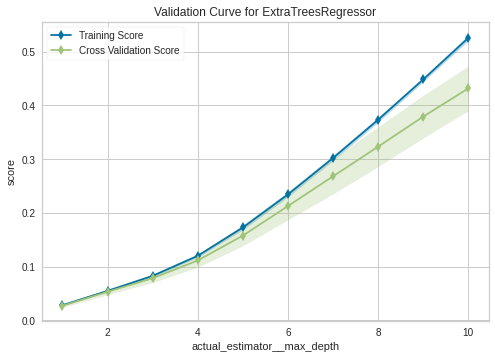

In [26]:
plot_model(best, plot = 'vc')